<a href="https://colab.research.google.com/github/cminho215/python_/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

array([[1.00671141, 0.87760447],
       [0.87760447, 1.00671141]])

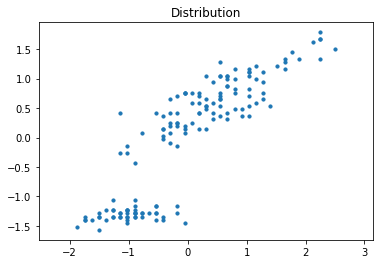

In [ ]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/iris.csv', sep=',')

x = np.array(df.loc[:, ["sepal.length", "petal.length"]])
x = StandardScaler().fit_transform(x)  # 학습할 데이터 정규화

n_features = x.shape[1]
plt.scatter(x = x.T[0], y = x.T[1], s = 10)
plt.title('Distribution')
plt.axis('equal');

np.cov(x.T)

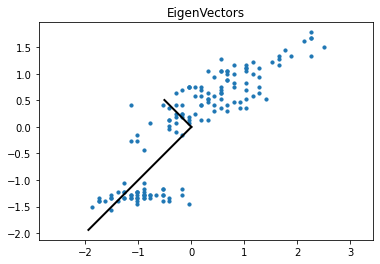

In [ ]:

cov = np.cov(x.T)
eValues, eVectors = np.linalg.eig(cov)

plt.scatter(x = x.T[0], y = x.T[1], s = 10)

for eValue, eVector in zip(eValues, eVectors.T):
    plt.plot([x.T[0].mean(), x.T[0].mean()+2*np.sqrt(eValue)*eVector[0]],
             [x.T[1].mean(), x.T[1].mean()+2*np.sqrt(eValue)*eVector[1]], 'k-', lw=2)
    
plt.title('EigenVectors')
plt.axis('equal');

In [ ]:
# covariance matrix를 항등행렬로 변환 
Rot = np.linalg.inv(eVectors)
Scale = np.linalg.inv(np.sqrt(np.diag(eValues)))
T = np.matmul(Scale, Rot)

tx = np.matmul(T, x.T).T
np.cov(tx.T)

array([[1.00000000e+00, 1.83333085e-15],
       [1.83333085e-15, 1.00000000e+00]])

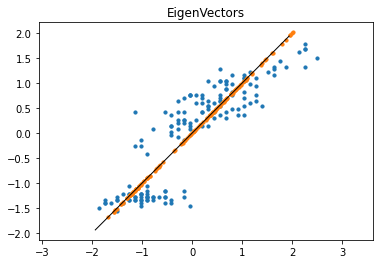

In [ ]:
#PCA

n_components = 1
eValues, eVectors = np.linalg.eig(cov)

for n in range(n_components):
    for i in range(n_features-1, n, -1):
        if(eValues[i-1] < eValues[i]):
            tmp = eValues[i]
            eValues[i] = eValues[i-1]
            eValues[i-1] = tmp

            tmp2 = np.vstack((eVectors.T[:i-1], eVectors.T[i]))
            tmp3 = np.vstack((eVectors.T[i-1], eVectors.T[i+1:]))            
            eVectors = np.vstack((tmp2, tmp3)).T
            
            
fit = eVectors.T[:n_components].T
fit_x = np.matmul(fit.T, x.T).T
g_x = np.matmul(fit_x, fit.T)

plt.scatter(x = x.T[0], y = x.T[1], s = 10)
    
for n in range(n_components):
    plt.plot([x.T[0].mean()-2*np.sqrt(eValues[n])*eVectors.T[n][0], x.T[0].mean()+2*np.sqrt(eValues[n])*eVectors.T[n][0]],
             [x.T[1].mean()-2*np.sqrt(eValues[n])*eVectors.T[n][1], x.T[1].mean()+2*np.sqrt(eValues[n])*eVectors.T[n][1]], 'k', lw=1)

plt.scatter(x = g_x.T[0], y =g_x.T[1], s = 10)
    
plt.title('EigenVectors')
plt.axis('equal');

In [ ]:
fit_x

In [ ]:
eValues[0]/eValues.sum()

0.9358768879432915